# Gender-separated comparison of PARs

This notebook contains code for plotting boxplot comparisons of the PARs for male-only and female-only groups. There was no significant difference in the mean PARs between the two groups.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import pearsonr
import pandas as pd
import csv
import math

In [2]:
'''
"dataconf" object and methods copied from the AgeRatesTurnkey.py file
'''

class dataconf :
    
    # TODO: Fix all these directories
    graph_dir = "graphs/"
    results_dir = "results/"
    DataSaveRoot = "data/"
    SASdistRoot = ""
    dataFile = ""
    SASroots = [
        SASdistRoot+"Baseline_V6/English/4.Data/SAS_Datasets/",
        SASdistRoot+"Follow-up1_V3/4.Data/SAS_Datasets/",
        SASdistRoot+"Follow-up2_V2/4.Data/SAS_Datasets/",
        SASdistRoot+"Follow-up3_V1/4.Data/SAS_Datasets/",
    ]
    SASfiles = {
        "Assays" : [
                SASroots[0]+"Assays/labo_raw.sas7bdat",
                SASroots[1]+"Assays/labf1raw.sas7bdat",
                SASroots[2]+"Assays/labf2raw.sas7bdat",
                SASroots[3]+"Assays/labf3raw.sas7bdat",
        ],
        "Diseases" : [
                SASroots[0]+"Diseases/adju_ana.sas7bdat",
                SASroots[1]+"Diseases/adjf1ana.sas7bdat",
                SASroots[2]+"Diseases/adjf2ana.sas7bdat",
                SASroots[3]+"Diseases/adjf3ana.sas7bdat",
        ],
        "Drugs" : [
                SASroots[0]+"Drugs/fmc_ana.sas7bdat",
                SASroots[1]+"Drugs/fmcf1ana.sas7bdat",
                SASroots[2]+"Drugs/fmcf2ana.sas7bdat",
                SASroots[3]+"Drugs/fmcf3ana.sas7bdat",
        ],
        "EKG_Doppler" : [
                SASroots[0]+"EKG_ENG_Doppler/mar_raw.sas7bdat",
                SASroots[1]+"EKG_ENG_Doppler/marf1raw.sas7bdat",
                SASroots[2]+"EKG_ENG_Doppler/marf2raw.sas7bdat",
                SASroots[3]+"EKG_ENG_Doppler/marf3raw.sas7bdat",
        ],
        "Interview" : [
                SASroots[0]+"Interview/int_rawe.sas7bdat",
                SASroots[1]+"Interview/inf1rawe.sas7bdat",
                SASroots[2]+"Interview/inf2rawe.sas7bdat",
                SASroots[3]+"Interview/inf3rawe.sas7bdat",
        ],
        "Med-Exam" : [
                SASroots[0]+"Medical_Exam/cli_rawe.sas7bdat",
                SASroots[1]+"Medical_Exam/clf1rawe.sas7bdat",
                SASroots[2]+"Medical_Exam/clf2rawe.sas7bdat",
                SASroots[3]+"Medical_Exam/clf3rawe.sas7bdat",
        ],
        "Nutrients-A" : [
                SASroots[0]+"Nutrients_Intake/alim_raw.sas7bdat",
                SASroots[1]+"Nutrients_Intake/alif1raw.sas7bdat",
                SASroots[2]+"Nutrients_Intake/alif2raw.sas7bdat",
                SASroots[3]+"Nutrients_Intake/alif3raw.sas7bdat",
        ],
        "Nutrients-B" : [
                SASroots[0]+"Nutrients_Intake/epic_raw.sas7bdat",
                SASroots[1]+"Nutrients_Intake/epif1raw.sas7bdat",
                SASroots[2]+"Nutrients_Intake/epif2raw.sas7bdat",
                SASroots[3]+"Nutrients_Intake/epif3raw.sas7bdat",
        ],
        "Nutrients-C" : [
                SASroots[0]+"Nutrients_Intake/nutr_raw.sas7bdat",
                SASroots[1]+"Nutrients_Intake/nutf1raw.sas7bdat",
                SASroots[2]+"Nutrients_Intake/nutf2raw.sas7bdat",
                SASroots[3]+"Nutrients_Intake/nutf3raw.sas7bdat",
        ],
        "Phys-Exam" : [
                SASroots[0]+"Physical_Exam/per_ana.sas7bdat",
                SASroots[1]+"Physical_Exam/pef1_ana.sas7bdat",
                SASroots[2]+"Physical_Exam/pef2_ana.sas7bdat",
                SASroots[3]+"Physical_Exam/pef3_ana.sas7bdat",
        ],
        # These appear to be the raw values used for computing the above
        # "Exam-B" : [
        #         SASroots[0]+"Physical_Exam/per_rawe.sas7bdat",
        #         SASroots[1]+"Physical_Exam/pef1rawe.sas7bdat",
        #         SASroots[2]+"Physical_Exam/pef2rawe.sas7bdat",
        #         SASroots[3]+"Physical_Exam/pef3rawe.sas7bdat",
        # ],
    }
    DS_types = list(SASfiles.keys())

    # TODO: Potentially drop? Have user manually clean their data, prep for direct usage in Pt04
    # These are dropped because they contain dates or ages
    drop_col_norm = [
        "CODE98",   # Unique subject ID code
        "DATA_NAS", # Date of birth/Data di nascita
        # The waves use letter codes to distinguish similar columns:
        # X: baseline, Y: Followup 1, Z: Followup 2, Q: Followup 3
        "DATEM",    # Date of Baseline instrumental exam
        "AGEM",     # Age at Baseline instrumental exam
        "DATE",     # Date of Baseline performance evaluation
        "AGE",      # Age at Baseline performance eval (years)
        "EPCDATE",  # Date of Baseline EPIC questionnaire
        "EPCAGE",   # Age at Baseline EPIC(years)/Et(anni)
        "VDATE",    # Date of Baseline medical examination
        "VAGE",     # Age at Baseline medical exam (years)
        "V1_V5",    # Month of Baseline medical examination
        "V1_V6",    # Day of Baseline medical examination
        "V1_V7",    # Year of Baseline medical examination
        "1_V7",     # Month of Baseline interview
        "1_V8",     # Day of Baseline interview
        "1_V9",     # Year of Baseline interview
        "1_V13",    # years you have been wearing glasses
        "1_V16",    # years you have been using hearing aid
        "IDATE",    # Date of Baseline Interview
        "IAGE",     # Age at the Baseline interview (years)
        "I1_V7",    # Month of Baseline interview
        "I1_V8",    # Day of Baseline interview
        "I1_V9",    # Year of Baseline interview
        "DATEL",    # Date of Baseline urine/fasting blood
        "AGEL",     # Age at Baseline fasting blood/urine(yrs)
        "CANYR",    # Year earliest cancer dx reported BL
        "IPR1YR",   # Clinical ex yr if hypertension measured
        "IPR2YR",   # Year hypertension dx reported BL
        "EPATYR",   # Year chron liver disease reported BL
        "GASTYR",   # Year gastrointest operations BL
        "ANGYR",    # Year angina dx reported Baseline
        "MIYR",     # Year myocardial infarction dx Baseline
        "CHFYR",    # Congestive heart failure year dx BL
        "STRKYR",   # Stroke or TIA year dx Baseline
        "PARKYR",   # Parkinson's disease year dx BL
        "PADIYR",   # Clinical yr if PAD measured/ROSE PAD
        "DIB1YR",   # FBG>140 or glycosuria,clin exam Baseline
        "DIB2YR",   # blood glucose>140 or diab dx year BL
        "DB1AYR",   # FBG>=126 or glycosuria,clin exam BL
        "DB2AYR",   # blood glucose>=126 or diab dx year BL
        "BPCOYR",   # Chronic bronchitis/emphysema dx yr BL
        "ASTHYR",   # Bronchial asthma dx yr Baseline
        "FFEMYR",   # Hip fracture yr dx Baseline
        "ERNDYR",   # Year herniated disc reported Baseline
        "GONAYR",   # Year knee arthritis reported FUP1
        "ANCAYR",   # Year hip arthritis reported Baseline
        "POSMYR",   # Poss osteoporosis(men),pQCT,year
        "POSFYR",   # Poss osteoporosis(women),pQCT,year
        "RL24YR",   # Impaired renal function (via 24-hour) yr
        "RENLYR",   # Impaired renal function (via C-G) year
        "FirstVisitDate", # SARDINIA
        "SecondVisitDate", # SARDINIA
        "ThirdVisitDate", # SARDINIA
        "FourthVisitDate", # SARDINIA
        "FifthVisitDate", # SARDINIA
        "pwvDate", # SARDINIA
        "Birthdate", # SARDINIA
        "Scandate", # SARDINIA
        "Subject#", # SARDINIA
        "date_neo", # SARDINIA
        "id_sir", # SARDINIA
        "id_mad", # SARDINIA
        "Wave", # SARDINIA
        "Visit", # SARDINIA
        "Occupation", # SARDINIA
        "Education", # SARDINIA
        "MaritalStatus" # SARDINIA
    ]

    common_col_norm = [
        "id_individual", # Needed to track samples
        "Age", # target variable
        "labsRBC",   #
        "labsHB", # 
        "labsMCV",    # 
        "labsMCH",     # 
        "labsWBC",     # 
        "labsPercNE",      # 
        "labsPercLY",  # 
        "labsPercMO",   # 
        "labsPercEO",    # 
        "labsPercBA",     #
        "V1_V5",
        "labsPLT",
        "labsHBF",
        "labsHBA2",
        "labsG6PD",
        "labsGlicemia",
        "labsInsulinemia",
        "labsAzotemia",
        "labsALT",
        "labsAST",
        "labsGammaGT",
        "labsFibrinogeno",
        "labsSideremia",
        "labsTransferrina",
        "labsBilirubinad",
        "labsBilirubinat",
        "labsAcidourico",
        "labsSodiemia",
        "labsPotassiemia",
        "labsVES",
        "labsPCR",
        "labsTSH",
        "labsFt4",
        "assayAdip",
        "assayLeptin",
        "assayMCP1",
        "assayIL6",
        "labsMCHC",
        "labsHtc",
        "labsMO_COUNT",
        "labsEO_COUNT",
        "labsBA_COUNT",
        "labsLY_COUNT",
        "labsNE_COUNT",
        "labsCreatinina",
        "labsColesterolo",
        "labsHDL",
        "labsTrigliceridi",
        "exmHeight",
        "exmWeight",
        "exmWaist",
        "exmHip",
        "exmBMI",
        "exmBPsys_jbs",
        "exmBPdia_jbs"
    ]

    common_cardio_col_norm = [
        "id_individual", # Needed to track samples
        "Age", # target variable
        "labsRBC",   #
        "labsHB", # 
        "labsMCV",    # 
        "labsMCH",     # 
        "labsWBC",     # 
        "labsPercNE",      # 
        "labsPercLY",  # 
        "labsPercMO",   # 
        "labsPercEO",    # 
        "labsPercBA",     #
        "V1_V5",
        "labsPLT",
        "labsHBF",
        "labsHBA2",
        "labsG6PD",
        "labsGlicemia",
        "labsInsulinemia",
        "labsAzotemia",
        "labsALT",
        "labsAST",
        "labsGammaGT",
        "labsFibrinogeno",
        "labsSideremia",
        "labsTransferrina",
        "labsBilirubinad",
        "labsBilirubinat",
        "labsAcidourico",
        "labsSodiemia",
        "labsPotassiemia",
        "labsVES",
        "labsPCR",
        "labsTSH",
        "labsFt4",
        "assayAdip",
        "assayLeptin",
        "assayMCP1",
        "assayIL6",
        "labsMCHC",
        "labsHtc",
        "labsMO_COUNT",
        "labsEO_COUNT",
        "labsBA_COUNT",
        "labsLY_COUNT",
        "labsNE_COUNT",
        "labsCreatinina",
        "labsColesterolo",
        "labsHDL",
        "labsTrigliceridi",
        "exmHeight",
        "exmWeight",
        "exmWaist",
        "exmHip",
        "exmBMI",
        "exmBPsys_jbs",
        "exmBPdia_jbs",
        "pwvQual",
        "pwv",
        "vasPSV",
        "vasEDV",
        "vasIP",
        "vasSDratio",
        "vasAT",
        "vasvti",
        "vasSysDiam",
        "vasDiaDiam",
        "vasIMT"
    ]

    # TODO: Have the user manually input their own bins for each wave?
    # These are emirically determined using the Pt-02-Binning.ipynb notebook
    # BestBins[wavenum][bin_yrs] = (age_start, age_end, n_train, n_test)
    BestBins = {
#         0 : {
#             7 : (24,87,36,2),
#             6 : (21,87,29,2),
#             # 6 : (22,88,30,2),
#             # 6 : (23,89,31,2),
#             # 6 : (24,90,25,2),
#             # 6 : (25,85,25,2),
#         },
#         1 : {
#             7 : (27,83,33,2),
#             6 : (26,86,25,2),
#         },
#         2 : {
#             7 : (32,88,31,2),
#             6 : (29,89,25,2),
#         },
#         3 : {
#             7 : (35,84,30,2),
#             6 : (31,85,25,2),
#         },
    }
    
    # These are empirically determined using the Pt-04-BestModels.ipynb notebook
    # N.B.: As LDA features are generally better than raw, values reported are for LDA features only
    BestNFeat = {
#         'KNNc-Fsr-b7s24t36-w0' : 55,
#         'KNNc-Fsr-b7s27t33-w1' : 38,
#         'KNNc-Fsr-b7s32t31-w2' : 47,
#         'KNNc-Fsr-b7s35t30-w3' : 28,

#         'KNNc-Fsr-b6s21t29-w0' : 54, # 0.9078
#         'KNNc-Fsr-b6s26t25-w1' : 32, # 0.8317
#         'KNNc-Fsr-b6s29t25-w2' : 42, # 0.8181
#         'KNNc-Fsr-b6s31t25-w3' : 34, # 0.7693

#         'KNNc-Fsr-b6s22t30-w0' : 64, # 0.9059
#         'KNNc-Fsr-b6s23t31-w0' : 53, # 0.9065
#         'KNNc-Fsr-b6s24t25-w0' : 52, # 0.8931
#         'KNNc-Fsr-b6s25t25-w0' : 51, # 0.8847

#         'KNNr-Fsr-b6s21t29-w0' : 68, # 0.9097
#         'KNNr-Fsr-b6s26t25-w1' : 38, # 0.8359
#         'KNNr-Fsr-b6s29t25-w2' : 42, # 0.8206
#         'KNNr-Fsr-b6s31t25-w3' : 33, # 0.7714

#         'KNNr-Fsr-b6s22t30-w0' : 65, # 0.9074
#         'KNNr-Fsr-b6s23t31-w0' : 75, # 0.9096
#         'KNNr-Fsr-b6s24t25-w0' : 66, # 0.8947
#         'KNNr-Fsr-b6s25t25-w0' : 58, # 0.8873

#         'WNDc-Fsr-b6s25t25-w0' : 54,
#         'WNDc-Fsr-b6s26t25-w1' : 38, # 0.8111
#         'WNDc-Fsr-b6s29t25-w2' : 42, # 0.7888
#         'WNDc-Fsr-b6s31t25-w3' : 50, # 0.7263
        
#         'RFr-Fsr-b6s21t29-w0'  : 46, # 0.9011
#         'RFr-Fsr-b6s26t25-w1'  : 35, # 0.8325
#         'RFr-Fsr-b6s29t25-w2'  : 42, # 0.8137
#         'RFr-Fsr-b6s31t25-w3'  : 33, # 0.7643

#         'RFr-FsrNL-b6s21t29-w0'  : 58, # 0.9153 No LDA
#         'RFr-FsrNL-b6s26t25-w1'  : 56, # 0.8731 No LDA
#         'RFr-FsrNL-b6s29t25-w2'  : 75, # 0.8652 No LDA
#         'RFr-FsrNL-b6s31t25-w3'  : 66, # 0.8246 No LDA

#         'RFr-Fsr-b6s25t25-w0'   : 45, # 0.8760
#         'RFr-FsrNL-b6s25t25-w0' : 63, # 0.8988 No LDA
        
#         'RFc-Fsr-b6s21t29-w0'  : 54, # 0.8919
#         'RFc-Fsr-b6s26t25-w1'  : 36, # 0.8300
#         'RFc-Fsr-b6s29t25-w2'  : 42, # 0.8069
#         'RFc-Fsr-b6s31t25-w3'  : 33, # 0.7559

#         'RFc-FsrNL-b6s21t29-w0'  : 51, # 0.9082 No LDA
#         'RFc-FsrNL-b6s26t25-w1'  : 62, # 0.8831 No LDA
#         'RFc-FsrNL-b6s29t25-w2'  : 58, # 0.8709 No LDA
#         'RFc-FsrNL-b6s31t25-w3'  : 55, # 0.8354 No LDA
    }

    # Dicts for keeping track of feature functions, classifiers and regressors defined below
    FeatFuncInfoByName = {}
    FeatFuncByName = {}
    FeatFuncLabelByName = {}

    ModelByModelName = {}
    ModelNameByModel = {}
    ModelTypeByModel = {}
    ModelLabelByModelName = {}
 
    def NormColNames (colname):
        colRE = "^([PVIFA]?)([XYZQ])(_?)(.+)$"
        colAGERE = "(^.+)?AGE(.+$)?"
        waveletters = ["X","Y","Z","Q"]
        normcol = colname
        m = re.search(colRE, colname)
        if m and m.groups()[1] in waveletters:
            normcol = m.groups()[3]
            if re.search (colAGERE, normcol):
                normcol = 'AGE'
                
        #     print ("{} -> {}".format(colname,normcol))
        # elif m:
        #     print ("{} -> {}".format(colname,m.groups()))
        # else:
        #     print ("{}: NO RE MATCH".format(colname))
        elif colname == 'CODE98':
            normcol = 'subj_id'
        return (normcol)
    
    def SAScols(sas7bdatObj):
        h = sas7bdatObj.header.parent
        cols = []
        enc = h.encoding
        enc_err = h.encoding_errors
        for col in h.columns:
            name = col.name.decode(enc,enc_err)
            desc = col.label.decode(enc,enc_err)
            norm = dataconf.NormColNames (name)
            if col.type == 'number' and col.format == 'DATE':
                fmt = 'date'
            else:
                fmt = col.type
            cols.append ({'name':name,'desc':desc,'norm':norm, 'fmt':fmt})
        return (cols)
    
    def BinLabel (bin_years,age_start,n_train):
        return ('b{}s{}t{}'.format (bin_years,age_start,n_train))

    def BestBinInfo (wavenum,bin_years):
        age_start, age_end, n_train, n_test, bin_lbl = (None,None,None,None,None)
#         if wavenum not in [0,1,2,3]:
#             raise ValueError('wavenum {} is invalid'.format(wavenum))
#         if bin_years not in [7,6]:
#             raise ValueError('bin_years {} is invalid'.format(bin_years))

        (age_start, age_end, n_train, n_test) = dataconf.BestBins[wavenum][bin_years]
        bin_lbl = dataconf.BinLabel (bin_years,age_start,n_train)        
        return (age_start, age_end, n_train, n_test, bin_lbl)

    def GetPredLabel (model_name,feat_func_name,nfeats,doLDA,bin_lbl,feature_type,nsplits):
        print("n splits: " + str(nsplits))
        model_label = dataconf.ModelLabelByModelName[model_name]
        feat_func_label = dataconf.FeatFuncLabelByName[feat_func_name]
        if not doLDA and not doLDA is None:
            feat_func_label += 'NL'

        if (nfeats):
            feat_label = feat_func_label+str(nfeats)
        else:
            feat_label = feat_func_label

        if bin_lbl is None:
            bin_lbl = ''
        else:
            bin_lbl = '-{}'.format(bin_lbl)

        if feature_type is None:
            feat_lbl = ''
        else:
            feat_lbl = '-{}'.format(feature_type)
        if nsplits is None:
            splits_label = ''
        elif nsplits >= 1000:
            splits_label = '-s'+str(int(nsplits/1000))+'k'
        else:
            splits_label = '-s'+str(nsplits)
        pred_label = '{}-{}{}{}{}'.format(model_label,feat_label,bin_lbl,feat_lbl,splits_label)
        return (pred_label)

  
    def GetBestNFeat (model_name,feat_func_name,bin_lbl,feature_type,numsplits):
        # Why no split #?
        best_feat_key = dataconf.GetPredLabel (model_name,feat_func_name,None,True,bin_lbl,feature_type,numsplits)
        best_feat_keyNL = dataconf.GetPredLabel (model_name,feat_func_name,None,False,bin_lbl,feature_type,numsplits)
        print(best_feat_key)
        if best_feat_keyNL in dataconf.BestNFeat:
            return (dataconf.BestNFeat[best_feat_keyNL], False)
        else:
            return (dataconf.BestNFeat[best_feat_key], True)
        
def Get_Binned_Data (feature_type, filename, age_start=None, age_end=None):
    
    in_path = './RawData/' + filename
    
    if feature_type == 'sardinia_common':
        df = read_common_features(in_path)
    elif feature_type == 'sardinia_common_cardio':
        df = read_common_cardio_features(in_path)
    else:
        df = read_data_updated2 (in_path,'features')
    data_matrix, col_names, age_col_idx, id_col_idx = convert_data (df)
    age_col = data_matrix[:,age_col_idx]
    n_features = len (col_names) - 2
    print ('cleaned features: ' + str(n_features))
    print ('cleaned samples: ' + str(data_matrix.shape[0]))

    if age_start is None or age_end is None:
        if feature_type == 'inchianti':
            print ("using inchianti binning...")
            (age_start, age_end, n_train, n_test, bin_years) = (23, 89, 19, 2, 6)
        else:
            (age_start, age_end, n_train, n_test, bin_years) = (12, 77, 120, 13, 5)

    data_class_views, class_vals = bin_data (age_start, age_end, bin_years, data_matrix, age_col)
    return (data_matrix, age_col_idx, id_col_idx, data_class_views, class_vals, col_names)

######################################################
def read_common_features(file_name):
    print ("Reading common clinical features...")
    x = pd.read_csv(file_name,sep='\t', na_values=[])
    x = x.dropna(axis=1, how='all')
    x = x.dropna(how='all')

    for feature_name in x.columns:
        if feature_name not in dataconf.common_col_norm:
            x = x.drop(feature_name, axis=1)

    threshold_num = 0.05
    for i in range (47):
        x = x.dropna(thresh=(x.shape[1]*threshold_num))
        x = x.dropna(axis=1, thresh=(x.shape[0]*threshold_num))
        threshold_num += 0.02
    x = x.dropna(how='any')

    return (x)

def read_common_cardio_features(file_name):
    print ("Reading common clinical features...")
    x = pd.read_csv(file_name,sep='\t', na_values=[])
    x = x.dropna(axis=1, how='all')
    x = x.dropna(how='all')

    for feature_name in x.columns:
        if feature_name not in dataconf.common_cardio_col_norm:
            x = x.drop(feature_name, axis=1)

    threshold_num = 0.05
    for i in range (47):
        x = x.dropna(thresh=(x.shape[1]*threshold_num))
        x = x.dropna(axis=1, thresh=(x.shape[0]*threshold_num))
        threshold_num += 0.02
    x = x.dropna(how='any')

    return (x)

def read_data_updated2(file_name, what_to_prioritize):
    x = pd.read_csv(file_name,sep='\t', na_values=[])
    x = x.dropna(axis=1, how='all')
    x = x.dropna(how='all')
    print ('initial feats:' + str(len(x.columns)))
    print ('initial samps:' + str(x.shape[0]))
    threshold_num = 0.05
    if what_to_prioritize is 'features':
        for i in range (47):
            x = x.dropna(thresh=(x.shape[1]*threshold_num))
            x = x.dropna(axis=1, thresh=(x.shape[0]*threshold_num))
            threshold_num += 0.02
        x = x.dropna(how='any')
    elif what_to_prioritize is 'samples':
        for i in range (47):
            x = x.dropna(axis=1, thresh=(x.shape[0]*threshold_num))
            x = x.dropna(thresh=(x.shape[1]*threshold_num))
            threshold_num += 0.02
        x = x.dropna(axis=1, how='any')
    else:
        return("Need to specify what to prioritize: 'features' or 'samples'")
    #x.to_csv("trimmedFile", sep='\t')

    x = clean_data(x)

    return (x)


def clean_data(x):    
    for drop_feature in dataconf.drop_col_norm:
        if drop_feature in x.columns:
            x = x.drop(drop_feature, axis=1)
    return (x)

def convert_data(df):
    data = df.as_matrix()
    col_names = df.columns.values
    return (data, col_names, df.columns.get_loc("Age"), df.columns.get_loc("id_individual"))


# In[13]:

def bin_data(start, end, size, data_matrix, age_col):
    bins = range (start, end+size, size)
    digitized = np.digitize(age_col, bins)

    views=[]
    for i in range (1,len(bins)):
        views.append (data_matrix[digitized == i,:])
#    views.pop()
    # initialize the class_values array (center of each bin)
    class_vals = [x+(size/2.0) for x in range(start, end, size)]
#    class_vals.pop()
    return (views, class_vals)
##############################################################3

def train_test_random (data_matrix, test_prop):
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(data_matrix, test_size=test_prop)
    return (train, test)

def elastic_net(train_data, train_labels, test_data, test_labels):
    from sklearn.linear_model import ElasticNet
    regr = ElasticNet(tol=0.1)
    regr.fit(train_data, train_labels)
    predicted = regr.predict(test_data)
    return (predicted)

def rand_forest(train_data, train_labels, test_data, test_labels):
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(n_estimators=30)
    forest.fit(train_data, train_labels)
    predicted = forest.predict(test_data)
    return (predicted)

def score (x, y):
    from scipy import stats
    rscore, p = stats.pearsonr(x, y)
    r2score = rscore**2
    return (r2score)

def average_list (lst):
    new_lst = []
    i = 0
    while i < len(lst[0]):
        sum_samples = 0
        for sample in lst:
            sum_samples += sample[i]
        avg = sum_samples / len(lst)
        new_lst.append(avg)
        i += 1
    return (new_lst)

##########################################

## Making boxplots...

initial feats:183
initial samps:6165


C:\Users\edsun\Anaconda3\lib\site-packages\ipykernel\__main__.py:575: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


cleaned features: 148
cleaned samples: 4817


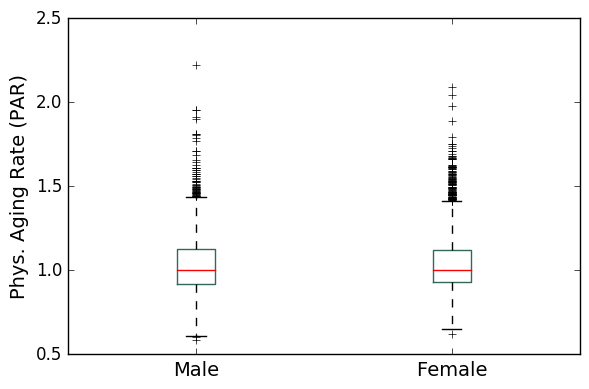

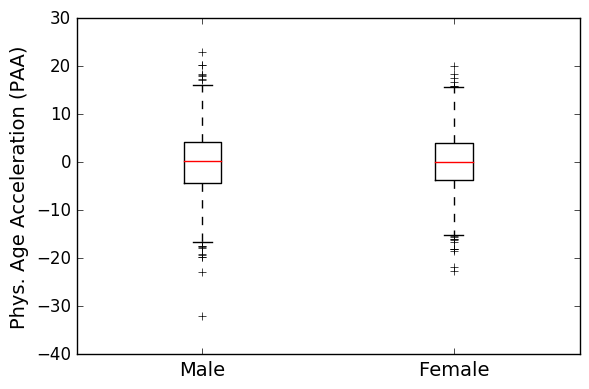

In [3]:
a1 = np.genfromtxt('./Results/Rates_Newest/RFC_Elnet_Sard1234_rates.tsv', delimiter='\t') 
data_matrix, age_col_idx, id_col_idx, data_class_views, class_vals, col_names = Get_Binned_Data('sardinia_normal', '2013-12-18-Sardinia-CleanUp-Data-Wave1.tsv')

male_eRAs = []
female_eRAs = []

male_PAAs = []
female_PAAs = []

sex_idx, = np.where(col_names == 'Sex')
for i, identity in enumerate(data_matrix[:,id_col_idx]):
    if identity in a1[:,0]:
        a1_id_idx, = np.where(a1[:,0]==identity)
        eRA = a1[a1_id_idx,1] # unscaled RFC
        PAA = a1[a1_id_idx,5]
        gender = data_matrix[i,sex_idx]
        if gender == 0: # female
            female_eRAs.append(eRA)
            female_PAAs.append(PAA)
        elif gender == 1: # male
            male_eRAs.append(eRA)
            male_PAAs.append(PAA)

box_plot_data=[male_eRAs, female_eRAs]
bp = pl.boxplot(box_plot_data, labels=['Male', 'Female'])
pl.ylabel('Phys. Aging Rate (PAR)', fontsize=14)
pl.setp(bp['boxes'], color='#34675C')
pl.setp(bp['whiskers'], color='black')
pl.setp(bp['fliers'], color='black')
pl.tick_params(axis='x', which='major', labelsize=14)
pl.tick_params(axis='y', which='major', labelsize=12)
pl.tight_layout()
pl.savefig('./Figures/SexSeparated/eRA_rfc_normal.png', dpi=800)
pl.show()

box_plot_data=[male_PAAs, female_PAAs]
bp = pl.boxplot(box_plot_data, labels=['Male', 'Female'])
pl.ylabel('Phys. Age Acceleration (PAA)', fontsize=14)
pl.setp(bp['boxes'], color='black')
pl.setp(bp['whiskers'], color='black')
pl.setp(bp['fliers'], color='#34675C')
pl.tick_params(axis='x', which='major', labelsize=14)
pl.tick_params(axis='y', which='major', labelsize=12)
pl.tight_layout()
pl.savefig('./Figures/SexSeparated/PAA_rfc_normal.png', dpi=800)
pl.show()